<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-transcripts-from-Facebook" data-toc-modified-id="Load-the-transcripts-from-Facebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the transcripts from Facebook</a></span></li><li><span><a href="#Preprocess-and-tokenise" data-toc-modified-id="Preprocess-and-tokenise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess and tokenise</a></span></li><li><span><a href="#Create-word-vectors-with-FastText" data-toc-modified-id="Create-word-vectors-with-FastText-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create word vectors with FastText</a></span></li><li><span><a href="#Load-fasttext-and-query" data-toc-modified-id="Load-fasttext-and-query-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load fasttext and query</a></span></li><li><span><a href="#Creating-BM25-document-vectors:" data-toc-modified-id="Creating-BM25-document-vectors:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating BM25 document vectors:</a></span></li><li><span><a href="#Load-document-vectors,-build-index-and-search:" data-toc-modified-id="Load-document-vectors,-build-index-and-search:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load document vectors, build index and search:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Querying-the-index" data-toc-modified-id="Querying-the-index-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Querying the index</a></span></li></ul></li></ul></li></ul></div>

In [11]:
import os
import pandas as pd
import numpy as np
import pickle
import click
import thinc
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
from gensim.models.fasttext import FastText
# !pip install rank_bm25 --quiet #install BM25
# !pip install --no-binary :all: nmslib #install nmslib
from rank_bm25 import BM25Okapi
import nmslib
import time
from google.colab import drive

# drive.mount('/content/drive') # if you want to use G Drive
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')


/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Load the transcripts from Facebook

In [12]:
from youtube_transcript_api import YouTubeTranscriptApi
from platform import python_version
print(python_version())

3.7.7


In [13]:
transcript_list_20_04_15 = YouTubeTranscriptApi.list_transcripts('wCaDb78vOtY') # apr 15 --> 1
transcript_list_20_04_20 = YouTubeTranscriptApi.list_transcripts('9uh2Zq7rpWI') # apr 20 --> 2
transcript_list_20_04_22 = YouTubeTranscriptApi.list_transcripts('67ohvRQJclo') # apr 22 --> 3
transcript_list_20_04_27 = YouTubeTranscriptApi.list_transcripts('xb2GM1EiZco') # apr 27 --> 4
transcript_list_20_05_04 = YouTubeTranscriptApi.list_transcripts('CPErAd9ZEMY') # may 4 --> 5
transcript_list_20_05_11 = YouTubeTranscriptApi.list_transcripts('txP6dO0i_4I') # may 11 --> 6
transcript_list_20_05_18 = YouTubeTranscriptApi.list_transcripts('O_wMUvFxqh0') # may 18 --> 7
transcript_list_20_06_01 = YouTubeTranscriptApi.list_transcripts('mLg8txbrh18') # jun 1 --> 8
transcript_list_20_06_08 = YouTubeTranscriptApi.list_transcripts('AdMHXOIM3wc') # jun 8 --> 9
transcript_list_20_06_15 = YouTubeTranscriptApi.list_transcripts('_4fsBL5R4rA') # jun 15 -->10
transcript_list_20_06_29 = YouTubeTranscriptApi.list_transcripts('s9UBbpJ5_yY') # jun 29 --> 11
transcript_list_20_07_13 = YouTubeTranscriptApi.list_transcripts('FBuHAY2Q6iE') # jul 13 --> 12
transcript_list_20_07_20 = YouTubeTranscriptApi.list_transcripts('Pvv_5u-JgkU') # jul 20 --> 13
transcript_list_20_07_27 = YouTubeTranscriptApi.list_transcripts('6KTqHoZ5yF0') # jul 27 --> 14
transcript_list_20_08_03 = YouTubeTranscriptApi.list_transcripts('iBx5-XE2jWo') # aug 3 --> 15
transcript_list_20_08_10 = YouTubeTranscriptApi.list_transcripts('N9sFlng3z6M') # aug 10 --> 16
transcript_list_20_08_17 = YouTubeTranscriptApi.list_transcripts('727l1vOlXhA') # aug 17 --> 17
transcript_list_20_08_24 = YouTubeTranscriptApi.list_transcripts('B9EV7x1Vv-c') # aug 24 --> 18
transcript_list_20_08_31 = YouTubeTranscriptApi.list_transcripts('4uGpiZSZ0Xk') # aug 31 --> 19
transcript_list_20_09_14 = YouTubeTranscriptApi.list_transcripts('3fOkP7nNajw') # sep 14 --> 20
transcript_list_20_09_21 = YouTubeTranscriptApi.list_transcripts('w2-SNHvH-QM') # sep 21 --> 21
transcript_list_20_09_28 = YouTubeTranscriptApi.list_transcripts('21FeT1Z_ntg') # sep 28 --> 22
transcript_list_20_10_05 = YouTubeTranscriptApi.list_transcripts('TpgQnORqnpc') # oct 5 --> 23
transcript_list_20_10_12 = YouTubeTranscriptApi.list_transcripts('SXgs5iXN2jE') # oct 12 --> 24
transcript_list_20_10_26 = YouTubeTranscriptApi.list_transcripts('fIW_6SrhhJo') # oct 26 --> 25
transcript_list_20_11_02 = YouTubeTranscriptApi.list_transcripts('if9ybN6SzdU') # nov 2 --> 26
transcript_list_20_11_09 = YouTubeTranscriptApi.list_transcripts('rD6xN51EvLI') # nov 9 --> 27
transcript_list_20_11_16 = YouTubeTranscriptApi.list_transcripts('aj4wCjhU25E') # nov 16  --> 28
transcript_list_20_11_30 = YouTubeTranscriptApi.list_transcripts('Tl9xdBbEWtU') # nov 30 --> 29
transcript_list_20_12_07 = YouTubeTranscriptApi.list_transcripts('Kp5--a_Or40') # dec 7 --> 30
transcript_list_20_12_14 = YouTubeTranscriptApi.list_transcripts('O5Y1tZtcA-I') # dec 14 -->31
transcript_list_20_12_21 = YouTubeTranscriptApi.list_transcripts('G5yQOSZs228') # dec 21 --> 32
transcript_list_21_01_04 = YouTubeTranscriptApi.list_transcripts('XwG1WVErygE') # jan 4 --> 33
transcript_list_21_01_11 = YouTubeTranscriptApi.list_transcripts('yvehrgqsdVg') # jan 11 --> 34
transcript_list_21_01_25 = YouTubeTranscriptApi.list_transcripts('eoxCOMH2e6U') # jan 25 --> 35
transcript_list_21_02_01 = YouTubeTranscriptApi.list_transcripts('k3WnSt7Q8u4') # feb 1 --> 36
transcript_list_21_02_08 = YouTubeTranscriptApi.list_transcripts('MgU9O8tWQjQ') # feb 8 --> 37
transcript_list_21_02_15 = YouTubeTranscriptApi.list_transcripts('olwBArtWj30') # feb 15 --> 38
transcript_list_21_02_22 = YouTubeTranscriptApi.list_transcripts('kSki_k4eYYk') # feb 22 --> 39
transcript_list_21_03_08 = YouTubeTranscriptApi.list_transcripts('6j4ksYnvhv4') # mar 8 --> 40
transcript_list_21_03_15 = YouTubeTranscriptApi.list_transcripts('Ph6aHWAVe3g') # mar 15 --> 41
transcript_list_21_03_22 = YouTubeTranscriptApi.list_transcripts('H1KeNsiVALc') # mar 22 --> 42
transcript_list_21_03_29 = YouTubeTranscriptApi.list_transcripts('MQ77n9-QikQ') # mar 29 --> 43
transcript_list_21_04_05 = YouTubeTranscriptApi.list_transcripts('wvSDW0T1cNk') # apr 5 --> 44
transcript_list_21_04_12 = YouTubeTranscriptApi.list_transcripts('4KhsoymQ1zM') # apr 12 --> 45
transcript_list_21_04_19 = YouTubeTranscriptApi.list_transcripts('LvKtcDJBySk') # apr 19 --> 46
transcript_list_21_04_26 = YouTubeTranscriptApi.list_transcripts('alcK8CuBkM4') # apr 26 --> 47
transcript_list_21_05_10 = YouTubeTranscriptApi.list_transcripts('7PRCqtNmGBc') # may 10 --> 48

transcript_list=zip(
                   transcript_list_20_04_15, transcript_list_20_04_20, transcript_list_20_04_22, 
                    transcript_list_20_04_27, transcript_list_20_05_04, transcript_list_20_05_11,
                    transcript_list_20_05_18, transcript_list_20_06_01, transcript_list_20_06_08, transcript_list_20_06_15, 
                    transcript_list_20_06_29, transcript_list_20_07_13, transcript_list_20_07_20, 
                    transcript_list_20_07_27, transcript_list_20_08_03, transcript_list_20_08_10, 
                    transcript_list_20_08_17, transcript_list_20_08_24 , transcript_list_20_08_31, 
                    transcript_list_20_09_14, transcript_list_20_09_21,  transcript_list_20_09_28,
                    transcript_list_20_10_05, transcript_list_20_10_12, transcript_list_20_10_26,
                    transcript_list_20_11_02,
                    transcript_list_20_11_09, transcript_list_20_11_16, transcript_list_20_11_30,
                    transcript_list_20_12_07, transcript_list_20_12_14, transcript_list_20_12_21,
                    transcript_list_21_01_04, transcript_list_21_01_11, transcript_list_21_01_25,
                    transcript_list_21_02_01, transcript_list_21_02_08, transcript_list_21_02_15,
                    transcript_list_21_02_22, transcript_list_21_03_08, transcript_list_21_03_15,
                    transcript_list_21_03_22, transcript_list_21_03_29, transcript_list_21_04_05,
                    transcript_list_21_04_12, transcript_list_21_04_19, transcript_list_21_04_26, transcript_list_21_05_10)


In [14]:
from datetime import timedelta

trans_list = []
time = []
date_list=[]

# transcript_list=ziptranscript_list=zip(
#                    transcript_list_20_04_15 , transcript_list_20_04_20, transcript_list_20_04_22, 
#                     transcript_list_20_04_27, transcript_list_20_05_04)

# date = ['4/5/2020', '4/20/2020', '4/22/2020', '4/27/2020', '5/4/2020']
date=['4/15/2020', '4/20/2020', '4/22/2020', 
                              '4/27/2020', '5/4/2020', '5/11/2020', '5/18/2020', '6/1/2020', '6/8/2020', 
                            '6/15/2020', '6/29/2020', '7/13/2020', '7/20/2020', '7/27/2020', 
                              '8/3/2020', '8/10/2020', '8/17/2020', '8/24/2020', '8/31/2020',
                            '9/14/2020', '9/21/2020',  '9/28/2020', '10/5/2020', '10/20/2020',
                             '10/26/2020', '11/2/2020', '11/9/2020',
                             '11/16/2020', '11/30/2020', '12/7/2020', 
                              '12/14/2020', '12/21/2020', '1/4/2021',
                             '1/11/2021', '1/25/2021', '2/1/2021', 
                              '2/8/2021', '2/15/2021', '2/22/2021',
                             '3/8/2021', '3/15/2021', '3/22/2021', 
                              '3/29/2021', '4/5/2021', '4/12/2021',
                             '4/19/2021', '4/26/2021', '5/10/2021']

for transcript in transcript_list:
    for i in range(48):
        trans=transcript[i].fetch()
        temp=[]
        day=date[i]
        print(day)
        for x in range(len(trans)):            
            temp.append(trans[x]['text'])
        joined = " ".join(temp)
        trans_list.append(joined)      
        date_list.append(day)


4/15/2020
4/20/2020
4/22/2020
4/27/2020
5/4/2020
5/11/2020
5/18/2020
6/1/2020
6/8/2020
6/15/2020
6/29/2020
7/13/2020
7/20/2020
7/27/2020
8/3/2020
8/10/2020
8/17/2020
8/24/2020
8/31/2020
9/14/2020
9/21/2020
9/28/2020
10/5/2020
10/20/2020
10/26/2020
11/2/2020
11/9/2020
11/16/2020
11/30/2020
12/7/2020
12/14/2020
12/21/2020
1/4/2021
1/11/2021
1/25/2021
2/1/2021
2/8/2021
2/15/2021
2/22/2021
3/8/2021
3/15/2021
3/22/2021
3/29/2021
4/5/2021
4/12/2021
4/19/2021
4/26/2021
5/10/2021


In [15]:
from pandas import DataFrame
df = pd.DataFrame(trans_list,columns=['text'])
df['time'] = pd.DataFrame(time,columns=['time'])
df['date'] = pd.DataFrame(date_list,columns=['date'])

In [16]:
df.shape

(48, 3)

In [17]:
# df.head(1)

In [18]:
df.to_csv('../data/echo_test.csv',header=True)

In [19]:
df = pd.read_csv ('../data/echo_test.csv', usecols= ['text','date'])
# # df.head(1)

### Preprocess and tokenise

In [20]:
import ftfy

# tokenise and do some cleaning: remove punctuation, white space 
# and convert the text to lowercase

nlp = spacy.load("en_core_web_sm")
tok_text=[] # for our tokenised corpus
text = df.text.str.lower().values
text = [ftfy.fix_text(str(i)) for i in text] # change bad unicode with good unicode

#Tokenising using SpaCy:
for doc in tqdm(nlp.pipe(text, n_threads=2, disable=["tagger", "parser","ner"])):
    tok = [t.text for t in doc if (t.is_ascii and not t.is_punct and not t.is_space)]
    tok_text.append(tok)


48it [00:00, 63.56it/s]


### Create word vectors with FastText

In [21]:

from gensim.models.fasttext import FastText

ft_model = FastText(
    sg=1, # use skip-gram: usually gives better results
    size=100, # embedding dimension (default)
    window=10, # window size: 10 tokens before and 10 tokens after to get wider context
    min_count=5, # only consider tokens with at least n occurrences in the corpus
    negative=15, # negative subsampling: bigger than default to sample negative examples more
    min_n=2, # min character n-gram
    max_n=5 # max character n-gram
)

ft_model.build_vocab(tok_text)

ft_model.train(
    tok_text,
    epochs=6,
    total_examples=ft_model.corpus_count, 
    total_words=ft_model.corpus_total_words)

ft_model.save('_fasttext_echo.model2')

### Load fasttext model and test making queries 

In [22]:
ft_model = FastText.load('_fasttext_echo.model2')

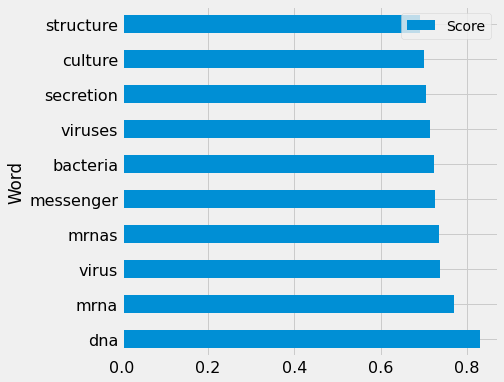

In [23]:
import matplotlib.style as style

plt.style.use('fivethirtyeight')
fig1=pd.DataFrame(ft_model.wv.most_similar("rna", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6))
fig1.tick_params(axis = 'both', which = 'major', labelsize = 16)
    

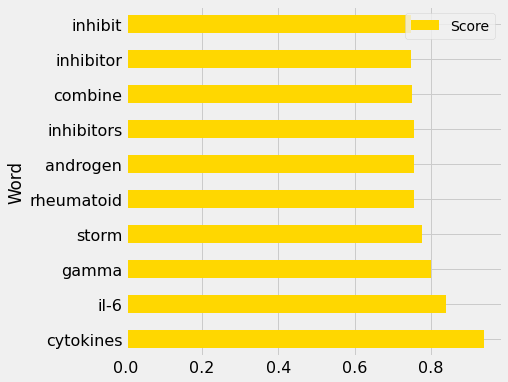

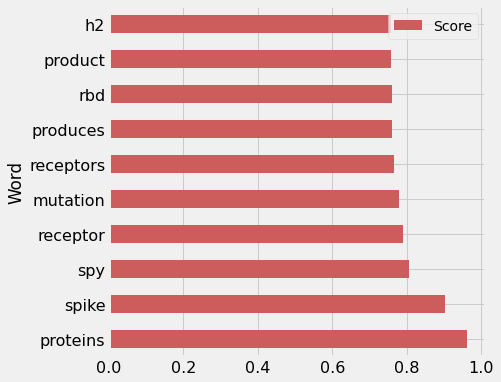

In [24]:

fig2=pd.DataFrame(ft_model.wv.most_similar("cytokine", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=('gold'))
fig2.tick_params(axis = 'both', which = 'major', labelsize = 16)
fig3=pd.DataFrame(ft_model.wv.most_similar("protein", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=('indianred'))    
fig3.tick_params(axis = 'both', which = 'major', labelsize = 16)


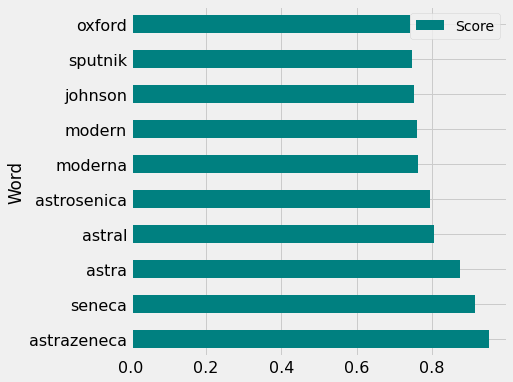

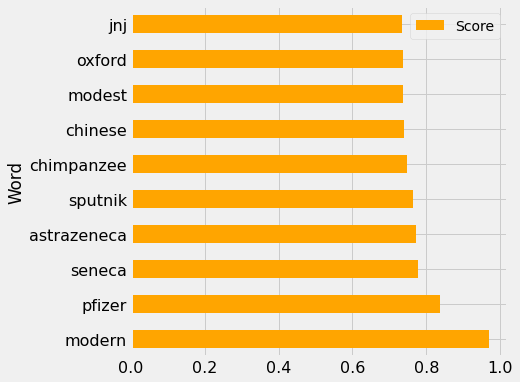

In [44]:

fig1= pd.DataFrame(ft_model.wv.most_similar("astra zeneca", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=('teal'))
fig1.tick_params(axis = 'both', which = 'major', labelsize = 16)

fig2= pd.DataFrame(ft_model.wv.most_similar("moderna", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=('orange'))
fig2.tick_params(axis = 'both', which = 'major', labelsize = 16)

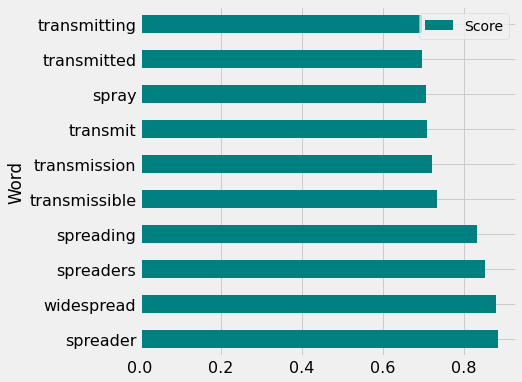

In [42]:
fig2= pd.DataFrame(ft_model.wv.most_similar("spread", topn=10, restrict_vocab=5000),columns=['Word','Score']).plot.barh(x='Word',figsize=(6,6),color=('teal'))
fig2.tick_params(axis = 'both', which = 'major', labelsize = 16)

### Creating BM25 document vectors:

In [27]:
bm25 = BM25Okapi(tok_text)
weighted_doc_vects = []

for i,doc in tqdm(enumerate(tok_text)):
    doc_vector = []
    for word in doc:
        vector = ft_model[word]
        weight = (bm25.idf[word] * ((bm25.k1 + 1.0)*bm25.doc_freqs[i][word])) 
        / 
        (bm25.k1 * (1.0 - bm25.b + bm25.b *(bm25.doc_len[i]/bm25.avgdl))+bm25.doc_freqs[i][word])
        weighted_vector = vector * weight
        doc_vector.append(weighted_vector)
    doc_vector_mean = np.mean(doc_vector,axis=0)
    weighted_doc_vects.append(doc_vector_mean)

0it [00:00, ?it/s]/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
48it [00:03, 12.95it/s]


In [28]:
pickle.dump( weighted_doc_vects, open( "weighted_doc_vects_ECHO2.p", "wb" ) )

### Load document vectors, build index and search:

In [29]:
with open( "weighted_doc_vects_ECHO2.p", "rb" ) as f:
    weighted_doc_vects = pickle.load(f)
# create a random matrix to index
data = np.vstack(weighted_doc_vects)

# initialize a new index, using a HNSW index on Cosine Similarity 
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(data)
index.createIndex({'post': 2}, print_progress=True)

##### Querying the index

These queries will display the info on the transcripts that include the information with the highest similarity to the queries

In [36]:
input = 'astra zeneca'.lower().split()


query = [ft_model[vec] for vec in input]
query = np.mean(query,axis=0)


ids, distances = index.knnQuery(query, k=5)

print(f'Searched {df.shape[0]} records \n')
print('------------------------------------')
for i,j in zip(ids,distances):
    print(f'Date: {df.date.values[i]}')
    print(f'Transcript #{i}')    
#     print(f'Text: "{df.text.values[i]}"')    
    print(f'Cosine similarity: {j:1.3f}')
    print('------------------------------------')


Searched 48 records 

------------------------------------
Date: 4/19/2021
Transcript #45
Cosine similarity: 0.357
------------------------------------
Date: 4/5/2021
Transcript #43
Cosine similarity: 0.357
------------------------------------
Date: 9/14/2020
Transcript #19
Cosine similarity: 0.359
------------------------------------
Date: 2/8/2021
Transcript #36
Cosine similarity: 0.359
------------------------------------
Date: 12/21/2020
Transcript #31
Cosine similarity: 0.359
------------------------------------


/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [46]:
## Display the transcript of one of the above results
df.text.values[31]

"okay okay that was a little louder okay welcome everybody to office hours it's december 21st and i'm joanna katzman i think i'm i think carla thornton is not here today um and uh i just wanted to let everybody know it's really good to see you i we had a great session last week talking about the new pfizer vaccine and really appreciate dr sosa dr hayes and dr sivers being on and giving such great updates just wanted to let everybody know that if you have a camera and it's on fantastic if you don't and you can put it on please do so it really is in line with the echo model and we can see you and it aligns with better uh better teaching also our fantastic digital librarian kent knowsworthy is on and he's always ready uh and always uh putting evidence guided and evidence-based information from our speakers and our subject matter experts into the chat which you can copy and paste and put into your browser and and take with you right away and finally um please don't hesitate to put any ques

In [32]:

input = 'plasma'.lower().split()


query = [ft_model[vec] for vec in input]
query = np.mean(query,axis=0)


ids, distances = index.knnQuery(query, k=5)

print(f'Searched {df.shape[0]} records \n')
print('------------------------------------')
for i,j in zip(ids,distances):
    print(f'Date: {df.date.values[i]}')
    print(f'Transcript #{i}')    
#     print(f'Text: "{df.text.values[i]}"')    
    print(f'Cosine similarity: {j:1.3f}')
    print('------------------------------------')


Searched 48 records 

------------------------------------
Date: 4/20/2020
Transcript #1
Cosine similarity: 0.577
------------------------------------
Date: 2/22/2021
Transcript #38
Cosine similarity: 0.580
------------------------------------
Date: 4/22/2020
Transcript #2
Cosine similarity: 0.583
------------------------------------
Date: 5/4/2020
Transcript #4
Cosine similarity: 0.584
------------------------------------
Date: 8/24/2020
Transcript #17
Cosine similarity: 0.585
------------------------------------


/Users/ariadnavargas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [33]:
## Display the transcript of one of the above results
df.text.values[4]

"hello dr katzman are you able to hear me can you hear me oh now i can yeah it's working it i i got it to work my family i ran into the office uh but now i'm back in my it's working now can you hear me yes could hear you great i'm glad to um i'm glad that it's working now um let me just and can you see me okay yes that's much better good actually actually it's weird my angle with this it looks like i'm looking down but i'm actually looking at the if your camera's not attached to the um the computer screen correct right right um i'm just gonna have to do the best i can right today okay how about now i mean let's see with it it's okay with the angle that you have your computer screen and the angle of the camera it does appear that you're not looking directly at um the camera but it's not terrible how about if not now does it look like i am yes so when i make my announcements i'm gonna be okay now let me actually now let me open box um okay now now let me read from box and see if i'm it l